Dataset: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

Reference: https://www.engineeringbigdata.com/breast-cancer-dataset-analysis-visualization-and-machine-learning-in-python/


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
breastCancer = pd.read_csv('/content/drive/My Drive/Data Analytics/DataSets/wdbc.data', sep=',')

In [6]:
print(breastCancer.columns)

Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')


In [7]:
breastCancer.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [8]:
print(breastCancer.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842517         M        20.57         17.77          132.90     1326.0   
1  84300903         M        19.69         21.25          130.00     1203.0   
2  84348301         M        11.42         20.38           77.58      386.1   
3  84358402         M        20.29         14.34          135.10     1297.0   
4    843786         M        12.45         15.70           82.57      477.1   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.08474           0.07864          0.0869              0.07017   
1          0.10960           0.15990          0.1974              0.12790   
2          0.14250           0.28390          0.2414              0.10520   
3          0.10030           0.13280          0.1980              0.10430   
4          0.12780           0.17000          0.1578              0.08089   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

In [9]:
print(breastCancer.shape)

(568, 32)


In [10]:
print(breastCancer.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       568 non-null    int64  
 1   diagnosis                568 non-null    object 
 2   radius_mean              568 non-null    float64
 3   texture_mean             568 non-null    float64
 4   perimeter_mean           568 non-null    float64
 5   area_mean                568 non-null    float64
 6   smoothness_mean          568 non-null    float64
 7   compactness_mean         568 non-null    float64
 8   concavity_mean           568 non-null    float64
 9   concave points_mean      568 non-null    float64
 10  symmetry_mean            568 non-null    float64
 11  fractal_dimension_mean   568 non-null    float64
 12  radius_se                568 non-null    float64
 13  texture_se               568 non-null    float64
 14  perimeter_se             5

In [11]:
print(breastCancer.groupby('diagnosis').size())

diagnosis
B    357
M    211
dtype: int64


The seaborn package provides a function called color_palette() that allows discrete color palettes. This will provide an interface to generate colors in seaborn, but also provide Hex color codes to your liking. In this example, we will provide the Hex color codes of #FF1493 (deep pink) and #FF69B4 (hot pink).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


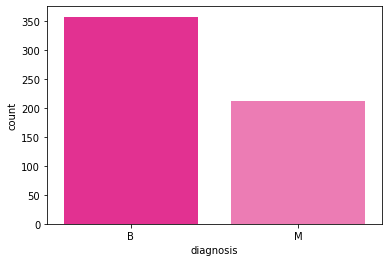

In [12]:
sns.countplot(breastCancer['diagnosis'], label="Count", palette=sns.color_palette(['#FF1493', '#FF69B4']),
              order=pd.value_counts(breastCancer['diagnosis']).iloc[:17].index)
plt.show()

The Pandas breast_cancer.corr() is used to find the pairwise correlation of all columns in the breast cancer dataframe. Correlation is used when referencing the strength of a relationship between two variables have a high/strong correlation means.

We must first drop the ‘id’ column as it provides no value when analyzing the dataset.

In [13]:
breastCancer = breastCancer.drop('id', axis=1)
breastCancerCorr = breastCancer.corr()
print(breastCancerCorr)

                         radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                 1.000000      0.329383        0.997876   0.987344   
texture_mean                0.329383      1.000000        0.335918   0.326193   
perimeter_mean              0.997876      0.335918        1.000000   0.986548   
area_mean                   0.987344      0.326193        0.986548   1.000000   
smoothness_mean             0.168094     -0.017769        0.204505   0.174838   
compactness_mean            0.505129      0.252038        0.555676   0.497981   
concavity_mean              0.676557      0.315248        0.715662   0.686232   
concave points_mean         0.823165      0.305590        0.851338   0.824246   
symmetry_mean               0.144236      0.080146        0.179100   0.148219   
fractal_dimension_mean     -0.317749     -0.068771       -0.268103  -0.288560   
radius_se                   0.678711      0.287615        0.690955   0.732879   
texture_se                 -

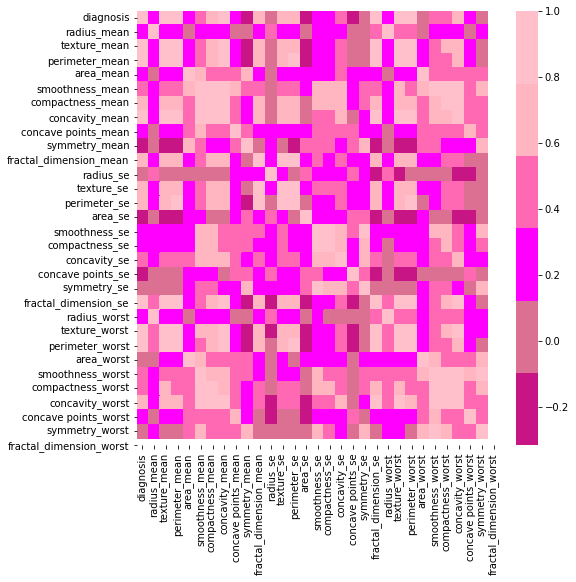

In [14]:
plt.figure(figsize=(8, 8))
sns.heatmap(breastCancerCorr, cbar=True, annot=False, yticklabels=breastCancer.columns,
            cmap=ListedColormap(['#C71585', '#DB7093', '#FF00FF', '#FF69B4', '#FFB6C1', '#FFC0CB']),
            xticklabels=breastCancer.columns)
plt.show()

In order to plot the next few plots, we must be able to analyze which features have the highest correlation.

The breast_cancer_corr data frame has 30 rows and 30 columns. This means when we sort the features with the highest correlation, the dataframe output will have have 900 rows.

breast_cancer_corr.abs()
The abs() function is used to return the absolute value of a number.

high_correlation.unstack()
The unstack() function in a dataframe unstacks the row to columns.

high_correlation_unstack.sort_values(ascending=False)
The sort.values() function will sort the values in ascending or descending order. Also, we will print the high correlation between 30 and 35 because the first the 29 values will have a correlation of 1.000000.

In [16]:
high_correlation = breastCancerCorr.abs()
high_correlation_unstack = high_correlation.unstack() 
high_correlation_sort = high_correlation_unstack.sort_values(ascending=False)
print(high_correlation_sort[30:35])

perimeter_mean   radius_mean        0.997876
radius_mean      perimeter_mean     0.997876
perimeter_worst  radius_worst       0.993814
radius_worst     perimeter_worst    0.993814
radius_mean      area_mean          0.987344
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


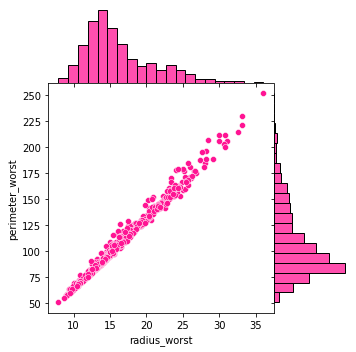

In [17]:
sns.jointplot("radius_worst", "perimeter_worst", data=breastCancer, kind="scatter",
              space=0, color="#FF1493", height=5, ratio=3)
plt.show()

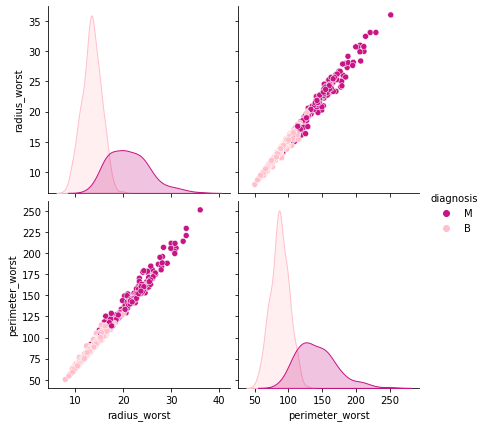

In [22]:
sns.pairplot(breastCancer, vars=["radius_worst", "perimeter_worst"],
             palette=sns.color_palette(['#C71585', '#FFC0CB']), hue='diagnosis', height=3)
plt.show()